## Number of examples vs Number of mistakes

In [192]:
from add_noise import add_noise
from gen import gen
import numpy as np
import math
import matplotlib.pyplot as plt

In [189]:
def perceptron(x, y):
    eta = 1
    m, n = x.shape
    w = np.zeros(n)
    theta = 0
    for i in range(20):
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
                w += eta * y[j] * x[j, :]
                theta += eta * y[j]
    return w, theta

def perceptron_margin(x, y, eta):
    m, n = x.shape
    w = np.zeros(n)
    theta = 0
    for i in range(20):
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= 1:
                w += eta * y[j] * x[j, :]
                theta += eta * y[j]
    return w, theta

def winnow(x, y, alpha):
    m, n = x.shape
    w = np.ones(n)
    theta = -n
    for i in range(20):
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
                for k in range(n):
                    w[k] = w[k] * alpha**(y[j]*x[j, k])
    return w, theta

def winnow_margin(x, y, alpha, gamma):
    m, n = x.shape
    w = np.ones(n)
    theta = -n
    for i in range(20):
        for j in range(m):
            if (np.dot(w, x[j, :]) + theta) * y[j] <= gamma:
                for k in range(n):
                    w[k] = w[k] * alpha**(y[j]*x[j, k])
    return w, theta

def adagrad(x, y, eta):
    m, n = x.shape
    w = np.append(np.ones(n), [-n])
    G = np.zeros(n+1)

    for i in range(20):
        for j in range(m):
            if (np.dot(w[:n], x[j, :]) + w[n]) * y[j] <= 1:
                # that gradient is -yx, and for $\theta$, it is always -y.
                g = np.append(-y[j] * x[j, :], -y[j])
                G += np.square(g)
                for k in range(n+1):
                    if G[k] != 0:
                        w[k] = w[k] - eta * g[k] / np.sqrt(G[k])
    return w[:n], w[n]

def accuracy(w, theta, x, y):
    correct = 0
    m, _ = x.shape
    for i in range(m):
        if (np.dot(w, x[i, :]) + theta) * y[i] >=0:
            correct += 1
    return 1.0*correct/m

In [190]:
def perceptron_error(x, y):
    eta = 1
    m, n = x.shape
    w = np.zeros(n)
    theta = 0
    error = np.zeros(501)
    total = 0

    for j in range(m):
        if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
            w += eta * y[j] * x[j, :]
            theta += eta * y[j]
            total += 1
        idx = np.floor(j/100) + 1
        error[idx] = total
    return error

def perceptron_margin_error(x, y, eta):
    m, n = x.shape
    w = np.zeros(n)
    theta = 0
    error = np.zeros(501)
    total = 0
    for j in range(m):
        if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
            total += 1

        if (np.dot(w, x[j, :]) + theta) * y[j] <= 1:
            w += eta * y[j] * x[j, :]
            theta += eta * y[j]
        idx = np.floor(j/100) + 1
        error[idx] = total
    return error

def winnow_error(x, y, alpha):
    m, n = x.shape
    w = np.ones(n)
    theta = -n
    error = np.zeros(501)
    total = 0

    for j in range(m):
        if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
            total += 1
            for k in range(n):
                w[k] = w[k] * alpha**(y[j]*x[j, k])
        idx = np.floor(j/100) + 1
        error[idx] = total
    return error

def winnow_margin_error(x, y, alpha, gamma):
    m, n = x.shape
    w = np.ones(n)
    theta = -n
    error = np.zeros(501)
    total = 0

    for j in range(m):
        if (np.dot(w, x[j, :]) + theta) * y[j] <= 0:
            total += 1
        
        if (np.dot(w, x[j, :]) + theta) * y[j] <= gamma:
            for k in range(n):
                w[k] = w[k] * alpha**(y[j]*x[j, k])
        idx = np.floor(j/100) + 1
        error[idx] = total
    return error

def adagrad_error(x, y, eta):
    m, n = x.shape
    w = np.append(np.ones(n), [-n])
    G = np.zeros(n+1)
    error = np.zeros(501)
    total = 0

    for j in range(m):
        if (np.dot(w[:n], x[j, :]) + w[n]) * y[j] <= 0:
            total += 1
        
        if (np.dot(w[:n], x[j, :]) + w[n]) * y[j] <= 1:
            # that gradient is -yx, and for $\theta$, it is always -y.
            g = np.append(-y[j] * x[j, :], -y[j])
            G += np.square(g)
            for k in range(n+1):
                if G[k] != 0:
                    w[k] = w[k] - eta * g[k] / np.sqrt(G[k])
        idx = np.floor(j/100) + 1
        error[idx] = total
    return error

In [16]:
y1,x1 = gen(10, 100, 500, 50000, False);
y2,x2 = gen(10, 100, 1000, 50000, False);

In [12]:
perceptron_params = [1.5,0.25,0.03,0.005,0.001]
winnow_params = [1.1,1.01,1.005,1.0005,1.0001]
winnow_margin_params1 = [1.1,1.01,1.005,1.0005,1.0001]
winnow_margin_params2 = [2.0,0.3,0.04,0.006,0.001]
adagrad_params = [1.5,0.25,0.03,0.005,0.001]

In [49]:
x1_train = x1[:5000,:]
y1_train = y1[:5000]
x1_test = x1[5001:10000,:] 
y1_test = y1[5001:10000] 

x2_train = x2[:5000,:]
y2_train = y2[:5000]
x2_test = x2[5001:10000,:]
y2_test = y2[5001:10000]


In [76]:
ans1 = {}
ans2 = {}
for eta in perceptron_params:
    w1,theta1 = perceptron_margin(x1_train,y1_train,eta)
    w2,theta2 = perceptron_margin(x2_train,y2_train,eta)
    acc1 = accuracy(w1,theta1,x1_test,y1_test)
    acc2 = accuracy(w2,theta2,x2_test,y2_test)
    print("Perceptron_Margin n = 500 : eta = {}, accuracy = {}".format(eta, acc1))
    ans1[eta] = acc1
    print("Perceptron_Margin n = 1000 : eta = {}, accuracy = {}".format(eta, acc2))
    ans2[eta] = acc2
print("The best eta for n = 500 is {}".format(sorted(ans1.items(), key=lambda x: -x[1])[0][0]))
print("The best eta for n = 1000 is {}".format(sorted(ans2.items(), key=lambda x: -x[1])[0][0]))



Perceptron_Margin n = 500 : eta = 1.5, accuracy = 0.978395679136
Perceptron_Margin n = 1000 : eta = 1.5, accuracy = 0.978395679136
Perceptron_Margin n = 500 : eta = 0.25, accuracy = 0.937187437487
Perceptron_Margin n = 1000 : eta = 0.25, accuracy = 0.937187437487
Perceptron_Margin n = 500 : eta = 0.03, accuracy = 0.98899779956
Perceptron_Margin n = 1000 : eta = 0.03, accuracy = 0.98899779956
Perceptron_Margin n = 500 : eta = 0.005, accuracy = 0.983396679336
Perceptron_Margin n = 1000 : eta = 0.005, accuracy = 0.983396679336
Perceptron_Margin n = 500 : eta = 0.001, accuracy = 0.906581316263
Perceptron_Margin n = 1000 : eta = 0.001, accuracy = 0.906581316263
The best eta for n = 500 is 0.03
The best eta for n = 1000 is 0.03


In [78]:
ans1 = {}
ans2 = {}
for alpha in winnow_params:
    w1,theta1 = winnow(x1_train,y1_train,alpha)
    w2,theta2 = winnow(x2_train,y2_train,alpha)
    acc1 = accuracy(w1,theta1,x1_test,y1_test)
    acc2 = accuracy(w2,theta2,x2_test,y2_test)
    print("winnow n = 500 : eta = {}, accuracy = {}".format(alpha, acc1))
    ans1[alpha] = acc1
    print("winnow n = 1000 : eta = {}, accuracy = {}".format(alpha, acc2))
    ans2[alpha] = acc2
print("The best alpha for n = 500 is {}".format(sorted(ans1.items(), key=lambda x: -x[1])[0][0]))
print("The best alpha for n = 1000 is {}".format(sorted(ans2.items(), key=lambda x: -x[1])[0][0]))


Perceptron_Margin n = 500 : eta = 1.1, accuracy = 0.999599919984
Perceptron_Margin n = 1000 : eta = 1.1, accuracy = 0.999599919984
Perceptron_Margin n = 500 : eta = 1.01, accuracy = 0.938387677536
Perceptron_Margin n = 1000 : eta = 1.01, accuracy = 0.938387677536
Perceptron_Margin n = 500 : eta = 1.005, accuracy = 0.73774754951
Perceptron_Margin n = 1000 : eta = 1.005, accuracy = 0.73774754951
Perceptron_Margin n = 500 : eta = 1.0005, accuracy = 0.534706941388
Perceptron_Margin n = 1000 : eta = 1.0005, accuracy = 0.534706941388
Perceptron_Margin n = 500 : eta = 1.0001, accuracy = 0.52950590118
Perceptron_Margin n = 1000 : eta = 1.0001, accuracy = 0.52950590118
The best alpha for n = 500 is 1.1
The best alpha for n = 1000 is 1.1


In [85]:
ans1 = {}
ans2 = {}
for alpha in winnow_margin_params1:
    for gamma in winnow_margin_params2:
        w1,theta1 = winnow_margin(x1_train,y1_train,alpha,gamma)
        w2,theta2 = winnow_margin(x2_train,y2_train,alpha,gamma)
        acc1 = accuracy(w1,theta1,x1_test,y1_test)
        acc2 = accuracy(w2,theta2,x2_test,y2_test)
        print("winnow_margin n = 500 : alpha = {}, gamma = {}, accuracy = {}".format(alpha, gamma, acc1))
        ans1[tuple((alpha,gamma))] = acc1
        print("winnow_margin n = 1000 : alpha = {}, gamma = {}, accuracy = {}".format(alpha, gamma, acc2))
        ans2[tuple((alpha,gamma))] = acc2
print("The best alpha,gamma for n = 500 is {}".format(sorted(ans1.items(), key=lambda x: -x[1])[0][0]))
print("The best alpha,gamma for n = 1000 is {}".format(sorted(ans2.items(), key=lambda x: -x[1])[0][0]))



winnow_margin n = 500 : alpha = 1.1, gamma = 2.0, accuracy = 0.998399679936
winnow_margin n = 1000 : alpha = 1.1, gamma = 2.0, accuracy = 0.998399679936
winnow_margin n = 500 : alpha = 1.1, gamma = 0.3, accuracy = 0.997399479896
winnow_margin n = 1000 : alpha = 1.1, gamma = 0.3, accuracy = 0.997399479896
winnow_margin n = 500 : alpha = 1.1, gamma = 0.04, accuracy = 0.998199639928
winnow_margin n = 1000 : alpha = 1.1, gamma = 0.04, accuracy = 0.998199639928
winnow_margin n = 500 : alpha = 1.1, gamma = 0.006, accuracy = 0.999199839968
winnow_margin n = 1000 : alpha = 1.1, gamma = 0.006, accuracy = 0.999199839968
winnow_margin n = 500 : alpha = 1.1, gamma = 0.001, accuracy = 0.999599919984
winnow_margin n = 1000 : alpha = 1.1, gamma = 0.001, accuracy = 0.999599919984
winnow_margin n = 500 : alpha = 1.01, gamma = 2.0, accuracy = 0.9549909982
winnow_margin n = 1000 : alpha = 1.01, gamma = 2.0, accuracy = 0.9549909982
winnow_margin n = 500 : alpha = 1.01, gamma = 0.3, accuracy = 0.9399879976

In [193]:
ans1 = {}
ans2 = {}
for eta in adagrad_params:
    w1,theta1 = adagrad(x1_train,y1_train,eta)
    w2,theta2 = adagrad(x2_train,y2_train,eta)
    acc1 = accuracy(w1,theta1,x1_test,y1_test)
    acc2 = accuracy(w2,theta2,x2_test,y2_test)
    print("adagrad n = 500 : eta = {}, accuracy = {}".format(eta, acc1))
    ans1[eta] = acc1
    print("adagrad n = 1000 : eta = {}, accuracy = {}".format(eta, acc2))
    ans2[eta] = acc2
print("The best eta for n = 500 is {}".format(sorted(ans1.items(), key=lambda x: -x[1])[0][0]))
print("The best eta for n = 1000 is {}".format(sorted(ans2.items(), key=lambda x: -x[1])[0][0]))



adagrad n = 500 : eta = 1.5, accuracy = 0.880776155231
adagrad n = 1000 : eta = 1.5, accuracy = 0.721544308862
adagrad n = 500 : eta = 0.25, accuracy = 0.599919983997
adagrad n = 1000 : eta = 0.25, accuracy = 0.560112022404
adagrad n = 500 : eta = 0.03, accuracy = 0.541908381676
adagrad n = 1000 : eta = 0.03, accuracy = 0.522704540908
adagrad n = 500 : eta = 0.005, accuracy = 0.53050610122
adagrad n = 1000 : eta = 0.005, accuracy = 0.521304260852
adagrad n = 500 : eta = 0.001, accuracy = 0.507901580316
adagrad n = 1000 : eta = 0.001, accuracy = 0.503700740148
The best eta for n = 500 is 1.5
The best eta for n = 1000 is 1.5


In [191]:
w_perceptron1 = perceptron_error(x1,y1)
w_perceptron2 = perceptron_error(x2,y2)

w_perceptron_margin1 = perceptron_margin_error(x1,y1,0.03)
w_perceptron_margin2 = perceptron_margin_error(x2,y2,0.03)

w_winnow1 = winnow_error(x1,y1,1.1)
w_winnow2 = winnow_error(x2,y2,1.1)

w_winnow_margin1 = winnow_margin_error(x1,y1,1.1,0.01)
w_winnow_margin2 = winnow_margin_error(x2,y2,1.1,2.0)

w_adagrad1 = adagrad_error(x1,y1,1.5)
w_adagrad2 = adagrad_error(x2,y2,1.5)

/Users/ShengliangDai/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ShengliangDai/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ShengliangDai/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ShengliangDai/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:66: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ShengliangDai/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:88: VisibleDeprecationWarning: using a non-integer number instead of an intege

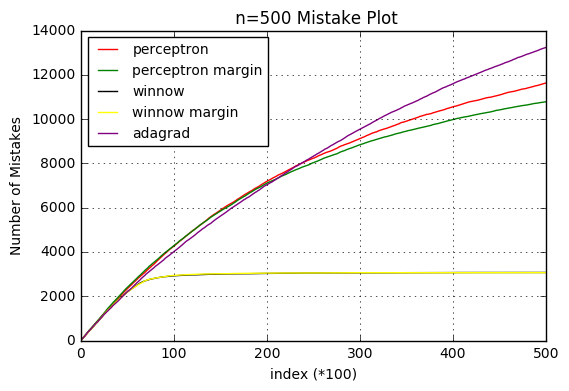

In [205]:
plt.gca().set_color_cycle(['red', 'green', 'black', 'yellow', 'purple'])

plt.plot(w_perceptron1)
plt.plot(w_perceptron_margin1)
plt.plot(w_winnow1)
plt.plot(w_winnow_margin1)
plt.plot(w_adagrad1)
plt.legend(['perceptron', 'perceptron margin', 'winnow', 'winnow margin', 'adagrad'],
           loc='upper left', prop={'size':10})
plt.title(' n=500 Mistake Plot')
plt.ylabel('Number of Mistakes')
plt.xlabel('index (*100)')
plt.grid()
plt.show()

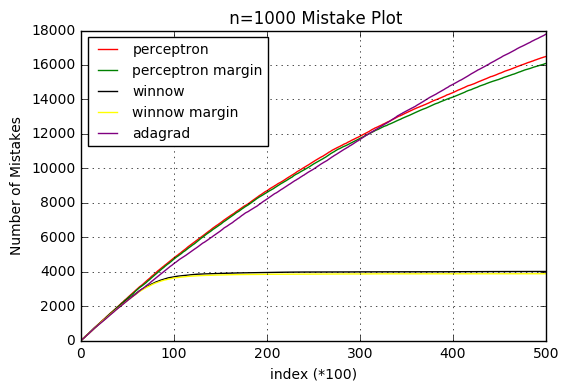

In [208]:
plt.gca().set_color_cycle(['red', 'green', 'black', 'yellow', 'purple'])

plt.plot(w_perceptron2)
plt.plot(w_perceptron_margin2)
plt.plot(w_winnow2)
plt.plot(w_winnow_margin2)
plt.plot(w_adagrad2)
plt.legend(['perceptron', 'perceptron margin', 'winnow', 'winnow margin', 'adagrad'],
           loc='upper left', prop={'size':10})
plt.title(' n=1000 Mistake Plot')
plt.ylabel('Number of Mistakes')
plt.xlabel('index (*100)')
plt.grid()
plt.show()